In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_labels.shape

(25000,)

In [5]:
max([max(seq) for seq in train_data])

9999

In [6]:
train_labels[0]

1

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = {value:key for key, value in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(index-3, '?') for index in train_data[0]])

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Vectorize data

In [9]:
import numpy as np

In [10]:
np.array([0,1,2,3,4])[[2,4]]

array([2, 4])

In [11]:
def vectorize_sequence(sequences, dimension=10000):
    vec = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        vec[i, sequences[i]] = 1
    return vec

In [12]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [13]:
x_train[0,:]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Compare model with fewer parameters (regularize by reduce model size)

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, 
                    epochs=20, validation_data=(x_val, y_val))

history_dict_1 = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.5150 - acc: 0.7893 - val_loss: 0.3961 - val_acc: 0.8627
Epoch 2/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.3131 - acc: 0.8992 - val_loss: 0.3199 - val_acc: 0.8770
Epoch 3/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.2287 - acc: 0.9269 - val_loss: 0.2912 - val_acc: 0.8851
Epoch 4/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1833 - acc: 0.9393 - val_loss: 0.2722 - val_acc: 0.8894
Epoch 5/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.1486 - acc: 0.9513 - val_loss: 0.2834 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1229 - acc: 0.9611 - val_loss: 0.2881 - val_acc: 0.8863
Epoch 7/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.1036 - acc: 0.9696 - val_loss: 0.3045 - val_acc

In [26]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape = (10000,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, 
                    epochs=20, validation_data=(x_val, y_val))

history_dict_2 = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.6124 - acc: 0.7305 - val_loss: 0.5442 - val_acc: 0.7823
Epoch 2/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.4795 - acc: 0.8631 - val_loss: 0.4458 - val_acc: 0.8581
Epoch 3/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.3788 - acc: 0.8989 - val_loss: 0.3822 - val_acc: 0.8611
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.3064 - acc: 0.9161 - val_loss: 0.3410 - val_acc: 0.8694
Epoch 5/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2550 - acc: 0.9275 - val_loss: 0.3065 - val_acc: 0.8848
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2167 - acc: 0.9363 - val_loss: 0.2859 - val_acc: 0.8885
Epoch 7/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1882 - acc: 0.9441 - val_loss: 0.2773 - val_ac

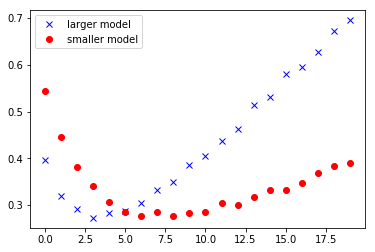

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history_dict_1['val_loss'], 'bx', label='larger model')
plt.plot(history_dict_2['val_loss'], 'ro', label='smaller model')
plt.legend()
plt.show()

In [31]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (10000,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, 
                    epochs=20, validation_data=(x_val, y_val))

history_dict_3 = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 348us/step - loss: 0.5362 - acc: 0.7798 - val_loss: 0.5406 - val_acc: 0.7615
Epoch 2/20
15000/15000 [==============================] - 5s 321us/step - loss: 0.2607 - acc: 0.8975 - val_loss: 0.2766 - val_acc: 0.8877
Epoch 3/20
15000/15000 [==============================] - 5s 323us/step - loss: 0.1558 - acc: 0.9463 - val_loss: 0.3430 - val_acc: 0.8674
Epoch 4/20
15000/15000 [==============================] - 5s 323us/step - loss: 0.0981 - acc: 0.9692 - val_loss: 0.3441 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 5s 323us/step - loss: 0.0159 - acc: 0.9959 - val_loss: 2.3882 - val_acc: 0.6368
Epoch 6/20
15000/15000 [==============================] - 5s 325us/step - loss: 0.0727 - acc: 0.9824 - val_loss: 0.4653 - val_acc: 0.8875
Epoch 7/20
15000/15000 [==============================] - 5s 324us/step - loss: 8.6375e-04 - acc: 1.0000 - val_loss: 0.569

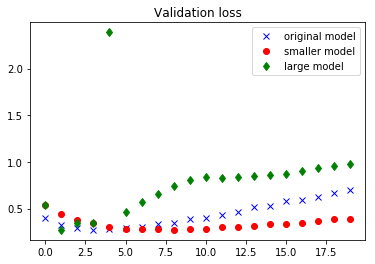

In [32]:
plt.plot(history_dict_1['val_loss'], 'bx', label='original model')
plt.plot(history_dict_2['val_loss'], 'ro', label='smaller model')
plt.plot(history_dict_3['val_loss'], 'gd', label='large model')
plt.title('Validation loss')
plt.legend()
plt.show()

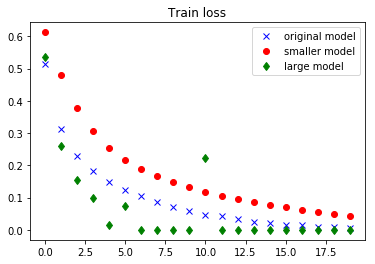

In [33]:
plt.plot(history_dict_1['loss'], 'bx', label='original model')
plt.plot(history_dict_2['loss'], 'ro', label='smaller model')
plt.plot(history_dict_3['loss'], 'gd', label='large model')
plt.title('Train loss')
plt.legend()
plt.show()

## Weight decay

In [36]:
from keras import regularizers

model = Sequential()
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                activation='relu', input_shape = (10000,)))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, 
                    epochs=20, validation_data=(x_val, y_val))

history_dict_1l2 = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.5630 - acc: 0.7931 - val_loss: 0.4393 - val_acc: 0.8707
Epoch 2/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.3694 - acc: 0.8962 - val_loss: 0.3619 - val_acc: 0.8857
Epoch 3/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.2963 - acc: 0.9205 - val_loss: 0.3374 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.2631 - acc: 0.9283 - val_loss: 0.3370 - val_acc: 0.8859
Epoch 5/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.2407 - acc: 0.9392 - val_loss: 0.3412 - val_acc: 0.8849
Epoch 6/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.2231 - acc: 0.9437 - val_loss: 0.3420 - val_acc: 0.8851
Epoch 7/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.2140 - acc: 0.9481 - val_loss: 0.3486 - val_ac

In [37]:
model = Sequential()
model.add(Dense(16, kernel_regularizer=regularizers.l1(0.001), 
                activation='relu', input_shape = (10000,)))
model.add(Dense(16, kernel_regularizer=regularizers.l1(0.001), 
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, 
                    epochs=20, validation_data=(x_val, y_val))

history_dict_1l1 = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 126us/step - loss: 1.0805 - acc: 0.7363 - val_loss: 0.7514 - val_acc: 0.7849
Epoch 2/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.6922 - acc: 0.8315 - val_loss: 0.6644 - val_acc: 0.8458
Epoch 3/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.6375 - acc: 0.8497 - val_loss: 0.6236 - val_acc: 0.8509
Epoch 4/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.6027 - acc: 0.8549 - val_loss: 0.6383 - val_acc: 0.8247
Epoch 5/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.5824 - acc: 0.8571 - val_loss: 0.5846 - val_acc: 0.8579
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.5692 - acc: 0.8577 - val_loss: 0.5892 - val_acc: 0.8471
Epoch 7/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.5540 - acc: 0.8643 - val_loss: 0.5774 - val_ac

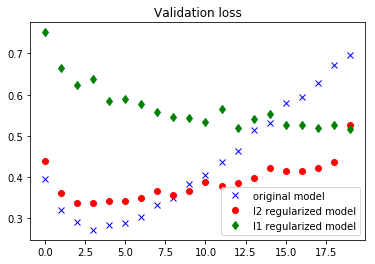

In [38]:
plt.plot(history_dict_1['val_loss'], 'bx', label='original model')
plt.plot(history_dict_1l2['val_loss'], 'ro', label='l2 regularized model')
plt.plot(history_dict_1l1['val_loss'], 'gd', label='l1 regularized model')
plt.title('Validation loss')
plt.legend()
plt.show()

In [39]:
from keras.layers import Dropout

In [40]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (10000,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, 
                    epochs=20, validation_data=(x_val, y_val))

history_dict_dropout = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.6567 - acc: 0.6073 - val_loss: 0.5664 - val_acc: 0.7940
Epoch 2/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.5559 - acc: 0.7364 - val_loss: 0.4639 - val_acc: 0.8519
Epoch 3/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.4707 - acc: 0.8082 - val_loss: 0.3878 - val_acc: 0.8734
Epoch 4/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.4078 - acc: 0.8498 - val_loss: 0.3467 - val_acc: 0.8744
Epoch 5/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.3520 - acc: 0.8792 - val_loss: 0.3293 - val_acc: 0.8752
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.3119 - acc: 0.9010 - val_loss: 0.2962 - val_acc: 0.8830
Epoch 7/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2758 - acc: 0.9168 - val_loss: 0.2862 - val_ac

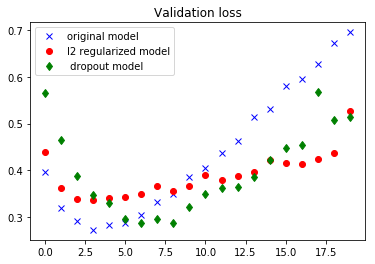

In [41]:
plt.plot(history_dict_1['val_loss'], 'bx', label='original model')
plt.plot(history_dict_1l2['val_loss'], 'ro', label='l2 regularized model')
plt.plot(history_dict_dropout['val_loss'], 'gd', label=' dropout model')
plt.title('Validation loss')
plt.legend()
plt.show()

In [21]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, batch_size=512, 
                    epochs=4)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.4741 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.2675 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.2034 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 1s 51us/step


In [22]:
results

[0.3111158518409729, 0.87612]

In [23]:
model.predict(x_test)

array([[0.16000584],
       [0.9998431 ],
       [0.39259014],
       ...,
       [0.08191341],
       [0.04899251],
       [0.46214366]], dtype=float32)